# Принятие решений в бизнесе: приоритизация гипотез и анализ A/B теста

<b>Описание проекта</b>

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

### Приоритизация гипотез

В файле "/datasets/hypothesis.csv" 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
Задача:

•	Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

•	Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

•	Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
data_hypo = pd.read_csv('/datasets/hypothesis.csv')
pd.options.display.max_colwidth = 120
data_hypo

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
data_hypo['ICE'] = round(data_hypo['Impact'] * data_hypo['Confidence'] / data_hypo['Efforts'], 2)
data_hypo[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


По фреймворку ICE можно выделить 3 лидирующие гипотезы. С большим отрывом на первом месте по приоритету стоит "Запустить акцию, дающую скидку на товар в день рождения", у нее высокие параметры Impact и Confidence и не очень высокий Efforts. На втором месте гипотеза "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" с похожими параметрами Impact и Confidence, но немного больший Efforts отодвигает ее в приоритете. Гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" на третьем месте. Четвертое и пятое место находятся немного ближе к лидерам, но все остальные гипотезы очень сильно от них отстают в приоритете либо из-за высоких Efforts, либо из-за низких Impact и Confidence.

In [4]:
data_hypo['RICE'] = round(data_hypo['Reach'] * data_hypo['Impact'] * data_hypo['Confidence'] / data_hypo['Efforts'], 2)
data_hypo[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Добавление параметра Reach неплохо меняет картину. Гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" сразу вышла на первое место с большим отрывом - только у неё максимальный охват пользователей. Высокий охват также повысил в приоритете гипотезу "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа": с пятого места сразу на второе. Не сильно ей проигрывают гипотезы "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа" и "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию". А вот лидер по фреймворку ICE теперь совсем не в приоритете: гипотеза "Запустить акцию, дающую скидку на товар в день рождения" имеет минимальный охват, поэтому в числовом выражении ее рейтинг не поменялся. Последние четыре места так и остаются далеко позади. Даже для гипотезы "Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар", имеющей довольно высокий Reach, ситуация кардинально не поменялась.

### Анализ A/B-теста

Вы провели A/B-тест и получили результаты, которые описаны в файлах "/datasets/orders.csv" и "/datasets/visitors.csv".

Задача:

Проанализируйте A/B-тест

#### Загрузка и предобработка

In [5]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

display('Таблица visitors ====================================================================================================')
display(visitors.head())
display(visitors.info())
display('Дубликаты в visitors', visitors.duplicated().sum())

display('Таблица orders ======================================================================================================')
display(orders.head())
display(orders.info())
display('Дубликаты в orders', orders.duplicated().sum())

'Таблица visitors ===================================================================================================='

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

'Дубликаты в visitors'

0

'Таблица orders ======================================================================================================'

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

'Дубликаты в orders'

0

Дубликатов и незаполненных ячеек в таблицах нет. В столбцах с датой изменим тип данных.

In [6]:
visitors['date'] = pd.to_datetime(visitors['date'])
orders['date'] = pd.to_datetime(orders['date'])
display(visitors.info())
display(orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


None

Проверим распределение пользователей по группам.

In [7]:
print('Всего пользователей, сделавших заказ', orders['visitorId'].nunique())
print('Всего пользователей, сделавших заказ, группа A', orders.query('group == "A"')['visitorId'].nunique())
print('Всего пользователей, сделавших заказ, группа B', orders.query('group == "B"')['visitorId'].nunique())
print('Всего пользователей, группа A + группа B', orders.query('group == "A"')['visitorId'].nunique() + orders.query('group == "B"')['visitorId'].nunique())

Всего пользователей, сделавших заказ 1031
Всего пользователей, сделавших заказ, группа A 503
Всего пользователей, сделавших заказ, группа B 586
Всего пользователей, группа A + группа B 1089


Сумма уникальных пользователей по группам больше, чем по общей выборке. 58 пользователей есть в обеих группах. Исходя из логики A/B теста, по-хорошему их надо исключить, но мы не можем их исключить из таблицы visitors, так как там нет их ID. Частично они будут исключены как аномальные пользователи с большим количеством заказов - если они попали в обе группы, у них есть минимум два заказа. Исходя из этго, предлагаю их оставить.

Саггрегируем данные и подготовим к анализу.

In [8]:
visitors_a_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']

visitors_a_cummulative = visitors_a_daily.apply(
    lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}
    ),
    axis=1,
)
visitors_a_cummulative.columns = ['date', 'visitors_cummulative_a']

visitors_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

visitors_b_cummulative = visitors_b_daily.apply(
    lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}
    ),
    axis=1,
)
visitors_b_cummulative.columns = ['date', 'visitors_cummulative_b']

orders_a_daily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
orders_a_daily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

orders_a_cummulative = orders_a_daily.apply(
    lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_a': 'sum', 'revenue_per_date_a': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_a_cummulative.columns = [
    'date',
    'orders_cummulative_a',
    'revenue_cummulative_a',
]

orders_b_daily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
orders_b_daily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

orders_b_cummulative = orders_b_daily.apply(
    lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_b': 'sum', 'revenue_per_date_b': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_b_cummulative.columns = [
    'date',
    'orders_cummulative_b',
    'revenue_cummulative_b',
]

all_in_one = (
    orders_a_daily.merge(orders_b_daily, left_on='date', right_on='date', how='left')
    .merge(orders_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(orders_b_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_a_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_b_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_b_cummulative, left_on='date', right_on='date', how='left')
)

all_in_one.head()

,date,orders_per_date_a,revenue_per_date_a,orders_per_date_b,revenue_per_date_b,orders_cummulative_a,revenue_cummulative_a,orders_cummulative_b,revenue_cummulative_b,visitors_per_date_a,visitors_per_date_b,visitors_cummulative_a,visitors_cummulative_b
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


#### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

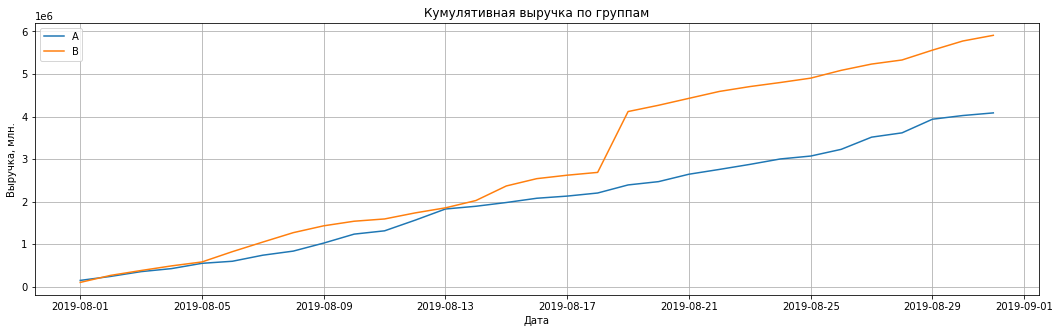

In [9]:
plt.figure(figsize=(18,5))
plt.plot(all_in_one['date'], all_in_one['revenue_cummulative_a'], label='A')
plt.plot(all_in_one['date'], all_in_one['revenue_cummulative_b'], label='B')
plt.title('Кумулятивная выручка по группам')
plt.xlabel("Дата")
plt.ylabel("Выручка, млн.")
plt.grid()
plt.legend()
plt.show()

В первые две недели теста выручка по группам повышается довольно линейно. Группа B показывает немного лучшие показатели, но без сильного отрыва. 18-19 августа в группе B виден сильный всплеск выручки, после чего продолжается линейный подъем. Возможно, в этих числах в группе B произошли несколько крупных покупок, которые так повлияли на выручку. Итоговое значение выручки по группе B почти в полтора раза выше, чем по группе A.

#### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

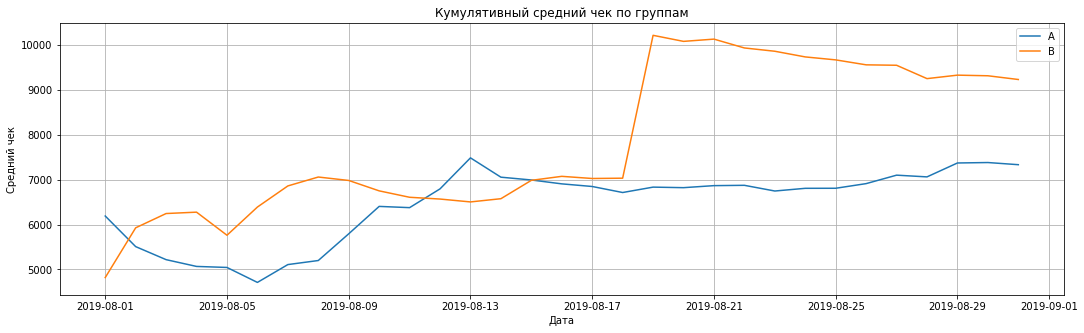

In [10]:
plt.figure(figsize=(18,5))
plt.plot(all_in_one['date'], all_in_one['revenue_cummulative_a']/all_in_one['orders_cummulative_a'], label='A')
plt.plot(all_in_one['date'], all_in_one['revenue_cummulative_b']/all_in_one['orders_cummulative_b'], label='B')
plt.title('Кумулятивный средний чек по группам')
plt.xlabel("Дата")
plt.ylabel("Средний чек")
plt.grid()
plt.legend()
plt.show()

До 18 августа видно колебания среднего чека по обоим группам. Группа A начинает с более высокой позиции, потом средний чек снижается, чтобы снова увеличиться и к 18 числу уже стабилизироваться. Похожие колебания и по группе B - график начинается низко, потом увеличивается, снова немного снижается, но 18-19 августа видно резкий рост. Предыдущее предположение подтверждается - одна или несколько крупных покупок увеличивает средний чек по группе в полтора раза. После этого значение среднего чека стабильно снижается. Итоговое значение среднего чека по группе B выше на четверть.

#### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

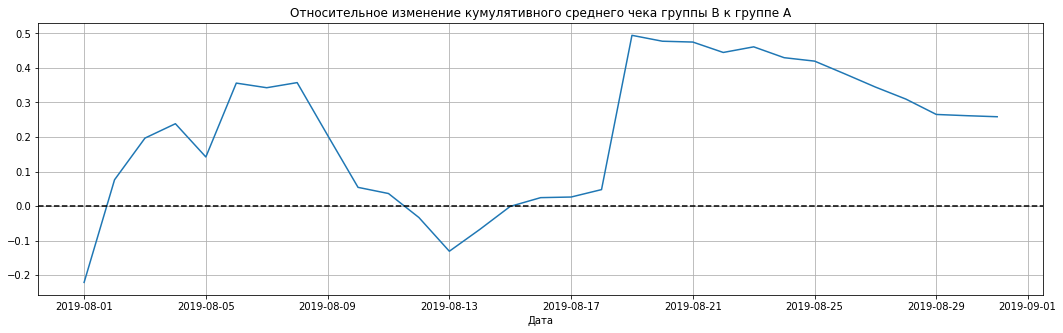

In [11]:
plt.figure(figsize=(18,5))
plt.plot(all_in_one['date'], (all_in_one['revenue_cummulative_b']/all_in_one['orders_cummulative_b'])/(all_in_one['revenue_cummulative_a']/all_in_one['orders_cummulative_a'])-1)
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel("Дата")
plt.axhline(y=0, color='black', linestyle='--')
plt.grid()
plt.show()

По графику видно, что значения среднего чека по группам к 18 августа заметно стабилизируются друг относительно друга, но выброс в группе сильно меняет картину.

#### Постройте график кумулятивного среднего количества заказов по группам. Сделайте выводы и предположения.

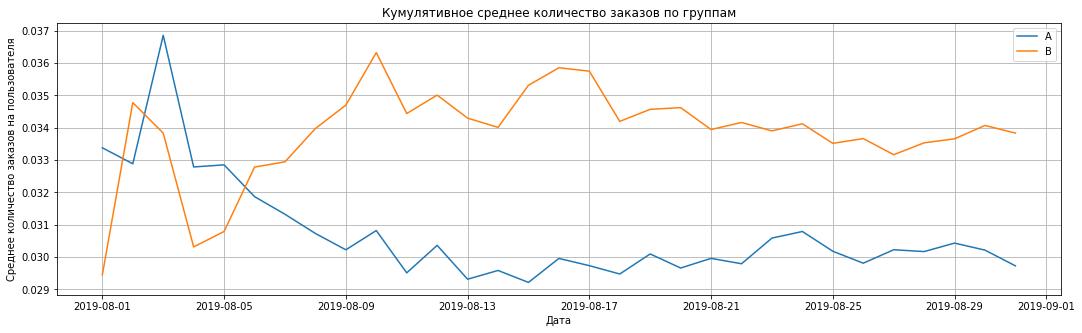

In [12]:
plt.figure(figsize=(18,5))
plt.plot(all_in_one['date'], all_in_one['orders_cummulative_a']/all_in_one['visitors_cummulative_a'], label='A')
plt.plot(all_in_one['date'], all_in_one['orders_cummulative_b']/all_in_one['visitors_cummulative_b'], label='B')
plt.title('Кумулятивное среднее количество заказов по группам')
plt.xlabel("Дата")
plt.ylabel("Среднее количество заказов на пользователя")
plt.grid()
plt.legend()
plt.show()

В первую неделю в обеих группах среднее количество заказов на пользователя сильно колеблется, но уже к 9 августа заметен тренд - среднее количество заказов в группе B стабильно выше, чем в группе A. К концу теста оба графика хорошо стабилизированы, серьезных выбросов я не вижу.

#### Постройте график относительного изменения кумулятивного среднего количества заказов группы B к группе A. Сделайте выводы и предположения.

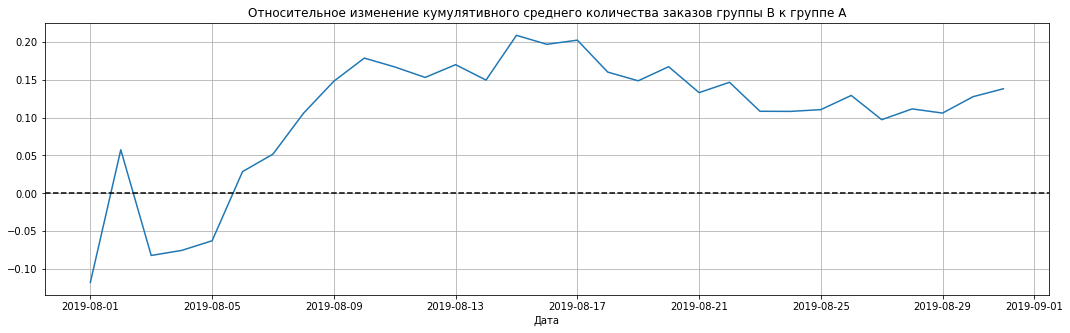

In [13]:
plt.figure(figsize=(18,5))
plt.plot(all_in_one['date'], (all_in_one['orders_cummulative_b']/all_in_one['visitors_cummulative_b'])/(all_in_one['orders_cummulative_a']/all_in_one['visitors_cummulative_a'])-1)
plt.title('Относительное изменение кумулятивного среднего количества заказов группы B к группе A')
plt.xlabel("Дата")
plt.axhline(y=0, color='black', linestyle='--')
plt.grid()
plt.show()

По графику относительного изменения среднего количества заказов на одного пользователя можно подтвердить, что после первой недели теста группа B стабильно превышает группу A по этому показателю. Итоговое значение среднего количества заказов у группы B выше почти на 15 процентов, чем у группы A.

#### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

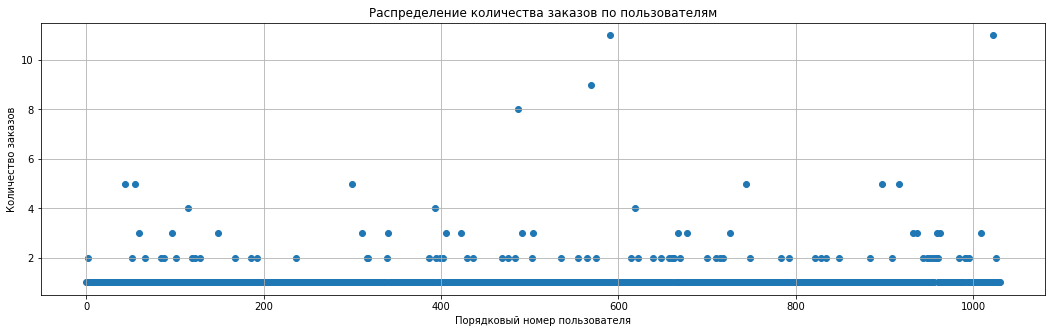

In [14]:
orders_by_users = orders.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})
orders_by_users.columns = ['userId', 'orders']
x_values = pd.Series(range(0,len(orders_by_users)))
plt.figure(figsize=(18,5))
plt.title('Распределение количества заказов по пользователям')
plt.xlabel("Порядковый номер пользователя")
plt.ylabel("Количество заказов")
plt.scatter(x_values, orders_by_users['orders'])
plt.grid()
plt.show()

Основная масса пользователей совершает 1 заказ. Те, кто сделал два заказа - уже редкость, но есть пользователи, совершившие даже 11 заказов. Если они попали в одну тестовую группу, это может быть причиной такой разницы в среднем количестве заказов между группами.

#### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [15]:
print(np.percentile(orders_by_users['orders'], [95, 96, 97, 98, 99]))

[2. 2. 2. 3. 4.]


В целом подтверждается, что большинство пользователей не сделали более 2 заказов. 99 процентов пользователей сделали не более 4 заказов. Думаю, адекватно будет установить границу для отсечения аномальных пользователей на 2 заказах, также это позволит также отсечь больше пользователей, участвующих в двух группах.

In [16]:
order_cutoff = np.percentile(orders_by_users["orders"], 97)

#### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

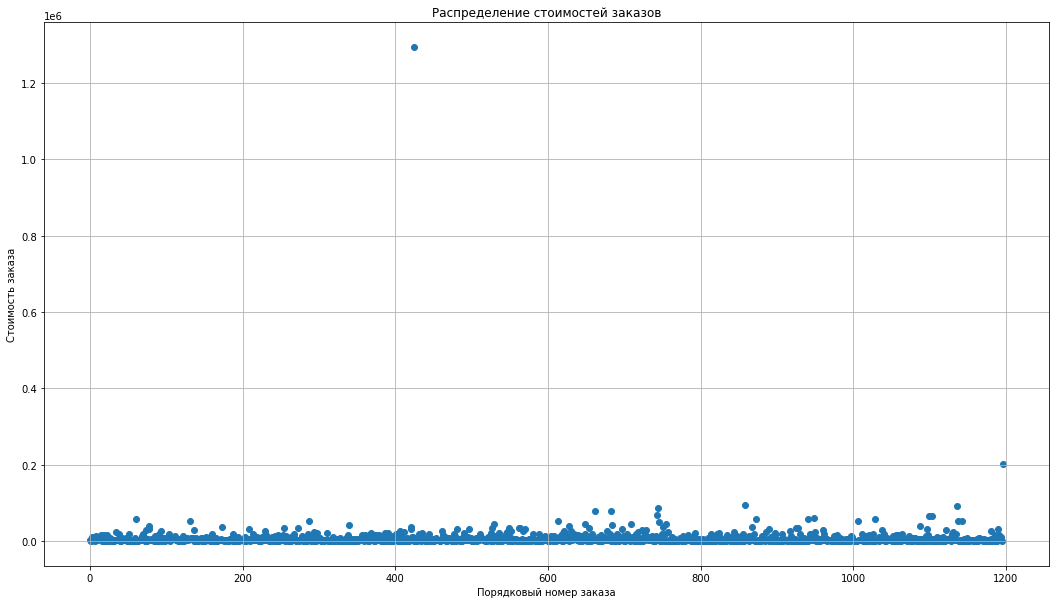

In [17]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(18,10))
plt.title('Распределение стоимостей заказов')
plt.xlabel("Порядковый номер заказа")
plt.ylabel("Стоимость заказа")
plt.scatter(x_values, orders['revenue'])
plt.grid()
plt.show()

Отчетливо видно, что большинство заказов явно дешевле 100 тысяч, но лучше разлядеть их структуру не получается. Явно видны выбросы в районе 200 тысяч и более 1,2 миллиона. Давайте их отсечем и посмотрим на нижнюю группу.

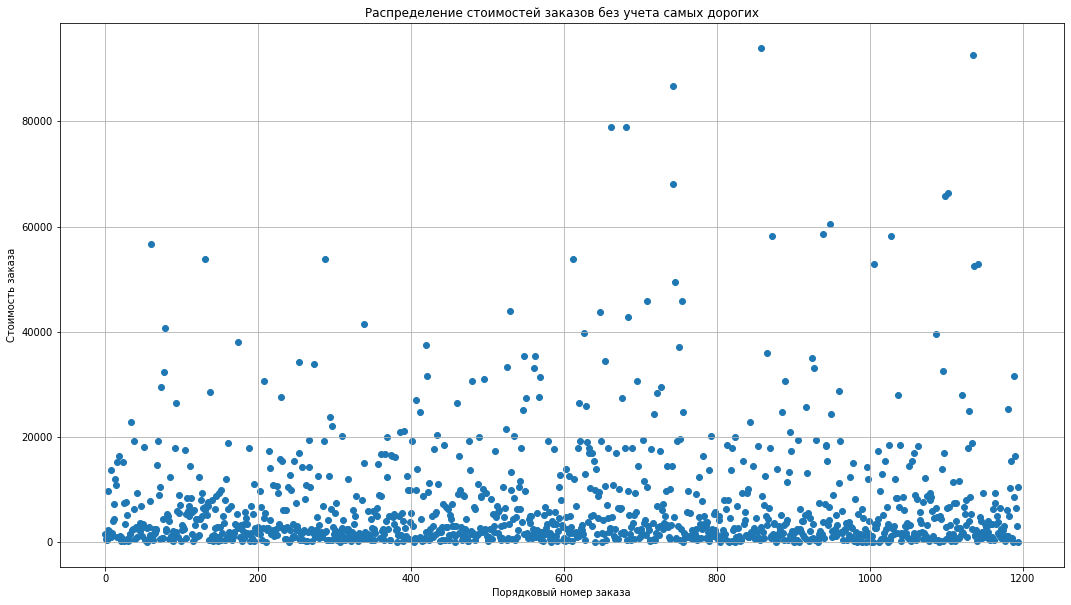

In [18]:
x_values = pd.Series(range(0,len(orders.query('revenue < 200000')['revenue'])))
plt.figure(figsize=(18,10))
plt.title('Распределение стоимостей заказов без учета самых дорогих')
plt.xlabel("Порядковый номер заказа")
plt.ylabel("Стоимость заказа")
plt.scatter(x_values, orders.query('revenue < 200000')['revenue'])
plt.grid()
plt.show()

Видно, что большинство заказов дешевле 20 тысяч. От 20 до 40 тысяч заказов меньше, но их всё равно заметное количество. Больше 40 тысяч - уже редкость.

#### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [19]:
print(np.percentile(orders['revenue'], [95, 96, 97, 98, 99]))

[28000.  31382.  35485.  44133.2 58233.2]


95 процентов пользователей сделали заказы не более, чем на 28 тысяч. 99 процентов - не дороже 58 тысяч. Думаю, адекватно установить границу для определения аномальных пользователей по стоимости заказа на значении 98 перцентиля.

In [20]:
revenue_cutoff = np.percentile(orders["revenue"], 98)

#### Посчитайте статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным. Сделайте выводы и предположения.

Примем нулевую гипотезу - среднее количество заказов на одного пользователя между группами не различается. Альтернативная: различия в среднем количестве заказов между группами есть.
    
Здесь и далее: уровень alpha принимаю за 0.05, проверка проводится критерием Манна-Уитни.

In [21]:
orders_by_users_a = orders.query('group == "A"').groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})
orders_by_users_a.columns = ['userId', 'orders']

orders_by_users_b = orders.query('group == "B"').groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})
orders_by_users_b.columns = ['userId', 'orders']

sample_a = pd.concat([orders_by_users_a['orders'],pd.Series(0, index=np.arange(all_in_one['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])), name='orders')],axis=0)
sample_b = pd.concat([orders_by_users_b['orders'],pd.Series(0, index=np.arange(all_in_one['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])), name='orders')],axis=0)

display("P-value: {0:.3f}".format(stats.mannwhitneyu(sample_a, sample_b)[1]))
display("Прирост среднего количества заказов по группе B относительно группы A: {0:.2%}".format(sample_b.mean() / sample_a.mean() - 1))

'P-value: 0.017'

'Прирост среднего количества заказов по группе B относительно группы A: 13.81%'

Получившееся p-value меньше 0.05, отвергаем нулевую гипотезу. Итоговое значение среднего количества заказов по группе B выше на 13.81 процентов, что подтверждает вывод по графику.

#### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

Примем нулевую гипотезу - средний чек заказа между группами не различается. Альтернативная: различия в среднем чеке заказа между группами есть.

In [22]:
display('P-value: {0:.3f}'.format(stats.mannwhitneyu(orders.query('group == "A"')['revenue'], orders.query('group == "B"')['revenue'])[1]))
display('Превышение среднего чека заказа по группе B относительно группы A: {0:.2%}'.format(orders.query('group == "B"')['revenue'].mean()/orders.query('group == "A"')['revenue'].mean()-1))

'P-value: 0.729'

'Превышение среднего чека заказа по группе B относительно группы A: 25.87%'

Нулевая гипотеза - средний чек по заказам между группами не различается. Получившееся p-value больше 0.05, отвергнуть нулевую гипотезу не получилось. Итоговое значение среднего чека по группе B выше на 25.87 процентов, что расходится с выводом по p-value. Стоит проверить эти данные после очистки от заказов аномальных пользователей, скорее всего превышение не является значимым и получено случайно.

#### Посчитайте статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным. Сделайте выводы и предположения.

Нулевая гипотеза та же - среднее количество заказов на одного пользователя между группами не различается. Альтернативная: различия в среднем количестве заказов между группами есть.
    
Делаю проверку на очищенных данных. Были исключены аномальные пользователи, сделавшие более 2 заказов и заказы на сумму более 44133.2.

In [23]:
users_with_many_orders = orders_by_users.query('orders > @order_cutoff')['userId']

users_with_expensive_orders = orders.query('revenue > @revenue_cutoff')['visitorId']

abnormal_users = pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0).drop_duplicates().sort_values()

sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['userId'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                all_in_one['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['userId'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                all_in_one['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

display('P-value: {0:.3f}'.format(stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]))
display('Прирост среднего количества заказов по группе B относительно группы A: {0:.2%}'.format(sample_b_filtered.mean()/sample_a_filtered.mean()-1))

'P-value: 0.007'

'Прирост среднего количества заказов по группе B относительно группы A: 18.64%'

После очистки от данных аномальных пользователей p-value снизился до 0.007, гипотезу о равенстве среднего количества заказов на пользователя между группами отвергаем более уверенно. Итоговое значение среднего количества заказов по группе B даже увеличилось до 18.64 процента, судя по всему аномальные пользователи были в обеих группах.

#### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

Принимаем нулевую гипотезу - средний чек заказа между группами не различается. Альтернативная: различия в среднем чеке заказа между группами есть.
    
Проверка на очищенных данных.

In [24]:
display(
    'P-value: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormal_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormal_users)),
                )
            ]['revenue'],
        )[1]
    )
)

display(
    "Превышение среднего чека заказа по группе B относительно группы A: {0:.2%}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

'P-value: 0.980'

'Превышение среднего чека заказа по группе B относительно группы A: 3.57%'

После очистки данных от заказов аномальных пользователей p-value увеличился, отвергнуть нулевую гипотезу также не получается. Итоговое значение среднего чека по группе B всё также выше, но отрыв от группы A теперь всего 3.57 процентов.

### Примите решение по результатам теста и объясните его.

Оба основных показателя по группам - средний чек по заказу и среднее количество заказов на пользователя достаточно стабильны, чтобы сделать вывод.

Можно утвержать, что средний чек между группами не различается. При этом, количество заказов на одного пользователя у группы B выше, различие подтверждено значением p-value.

Считаю, что стоит остановить тест и зафиксировать победу группы B.